In [8]:
import matplotlib.pyplot as plt
import yaml
import torch
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# from config import settings

plt.style.use('seaborn-whitegrid')
plt.rcParams['font.size'] = 35
plt.rcParams['pdf.fonttype'] = 42
colors = [
    '#004daf',
    '#ed1b3a',
    '#ff9900',
    '#33a02c',
    '#fabeaf',
    '#aad59b'
]
bandwidth = 10 * 1000 * 1000 / 8 # 10 Mbps
inference = 0.05
latency = 0.03 # 30ms network latency

def savefig(filename, fig):
    import time
    timestr = time.strftime("%Y%m%d-%H%M%S")
    fig.savefig(f'{filename}_time_{timestr}.pdf', bbox_inches='tight')
    fig.savefig(f'{filename}.pdf', bbox_inches='tight')

In [2]:
with open('stats/temp6.yaml', 'r') as f:
    stats = yaml.load(f.read())
stats = pd.DataFrame.from_dict(stats)
raw_stats = stats


/dataheart/kuntai_recovery/envs/diff/lib/python3.7/site-packages/ipykernel_launcher.py:2: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  


0.6737738950895826


Text(0, 0.5, 'Accuracy change')

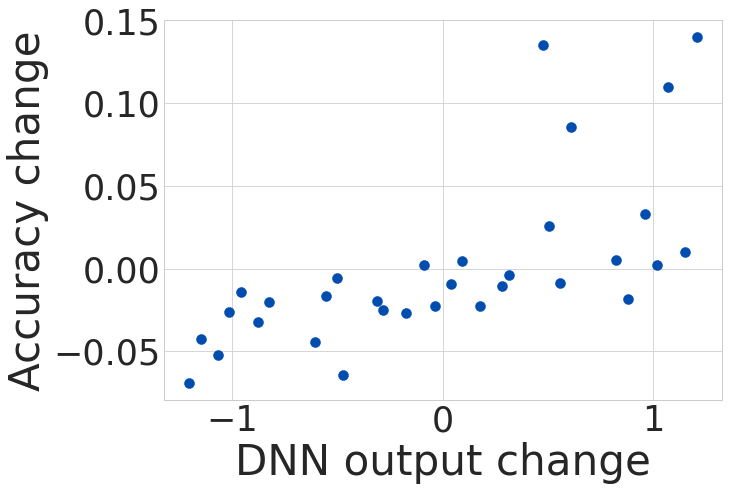

In [49]:
import torch

fig, ax = plt.subplots(figsize=(10, 7))

r = 3
idx = torch.randperm(125)

stats = raw_stats.copy()
stats = stats[stats['input']  == f"/dataheart/dataset/downtown/downtown_5/part%d.mp4"]
stats = stats[stats['second']  < 6]
stats = stats.groupby(['qpidx','residx', 'fridx']).mean().reset_index()
shift_idx=62
shifted_stats = stats.copy()
for key in ['qpidx', 'residx', 'fridx', 'f1', 'inference_sigmoid', 'inference_sum']:
    shifted_stats[key] -= shifted_stats.iloc[shift_idx][key]

key = 'inference_sigmoid'
dqp = -abs(shifted_stats[(shifted_stats.qpidx == 1) & (shifted_stats.residx == 0) & (shifted_stats.fridx == 0)].iloc[0][key])
dres = -abs(shifted_stats[(shifted_stats.qpidx == 0) & (shifted_stats.residx == 1) & (shifted_stats.fridx == 0)].iloc[0][key])
dbf = -abs(shifted_stats[(shifted_stats.qpidx == 0) & (shifted_stats.residx == 0) & (shifted_stats.fridx == 1)].iloc[0][key])

# shifted_stats = shifted_stats[shifted_stats.fridx == 0]

shifted_stats['dacc'] = shifted_stats['qpidx'] * dqp + shifted_stats['residx'] * dres + shifted_stats['fridx'] * dbf
# shifted_stats = shifted_stats[(shifted_stats.qpidx.abs() == r) & (shifted_stats.residx.abs() == r) & (shifted_stats.fridx.abs() == r)]
shifted_stats = shifted_stats[(shifted_stats.qpidx.abs() + shifted_stats.residx.abs() + shifted_stats.fridx.abs()) == r]
# shifted_stats = shifted_stats[shifted_stats.qpidx==0]
daccs = torch.tensor(shifted_stats['dacc'].tolist())
df1s = torch.tensor(shifted_stats['f1'].tolist())



# ax.scatter(daccs[idx[:25]], df1s[idx[:25]], c=colors[0], s=100)
ax.scatter(daccs, df1s, c=colors[0], s=100)
print(shifted_stats['dacc'].corr(shifted_stats['f1']))

ax.set_xlabel('DNN output change')
ax.set_ylabel('Accuracy change')
        # ax[i,j].set_xlabel()
        # ax[i,j].set_ylabel()

In [44]:
savefig('/home/kuntai/paper/OneAdapt-SIGCOMM-23/figs/accuracy_proxy_new', fig)

AttributeError: 'Figure' object has no attribute 'supxlabel'

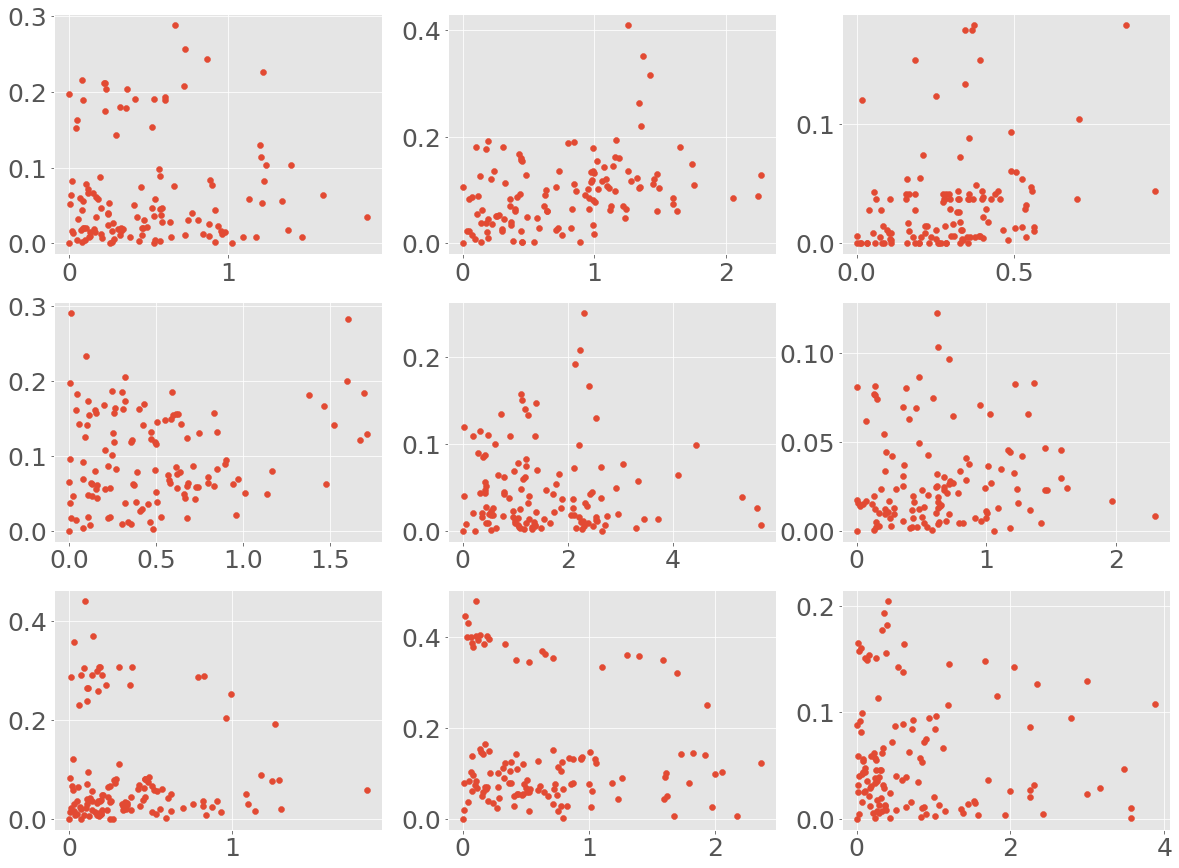

In [3]:
fig, ax = plt.subplots(3,3,figsize=(20, 15))

r = 2

for i in range(3):
    for j in range(3):
        stats = raw_stats.copy()
        stats = stats[stats['input']  == f"/dataheart/dataset/downtown/downtown_{i*3+j+1}/part%d.mp4"]
        stats = stats[stats['second']  < 6]
        stats = stats.groupby(['qpidx','residx', 'fridx']).mean().reset_index()
        shift_idx = 62
        shifted_stats = stats.copy()
        for key in ['qpidx', 'residx', 'fridx', 'f1', 'inference_sigmoid', 'inference_sum']:
            shifted_stats[key] -= shifted_stats.iloc[62][key]
        shifted_stats = shifted_stats[(shifted_stats.qpidx.abs() <= r) & (shifted_stats.residx.abs() <= r) & (shifted_stats.fridx.abs() <= r)]
        ax[i,j].scatter(shifted_stats['inference_sigmoid'].abs().tolist(), shifted_stats['f1'].abs().tolist())

fig.supxlabel('Inference result change (abs)')
fig.supylabel('Accuracy change (abs)')
        # ax[i,j].set_xlabel()
        # ax[i,j].set_ylabel()

0.6485602425661017
0.19234718940955284


'\n0.5715792263744846\n0.0873636704383184\n\n\n'

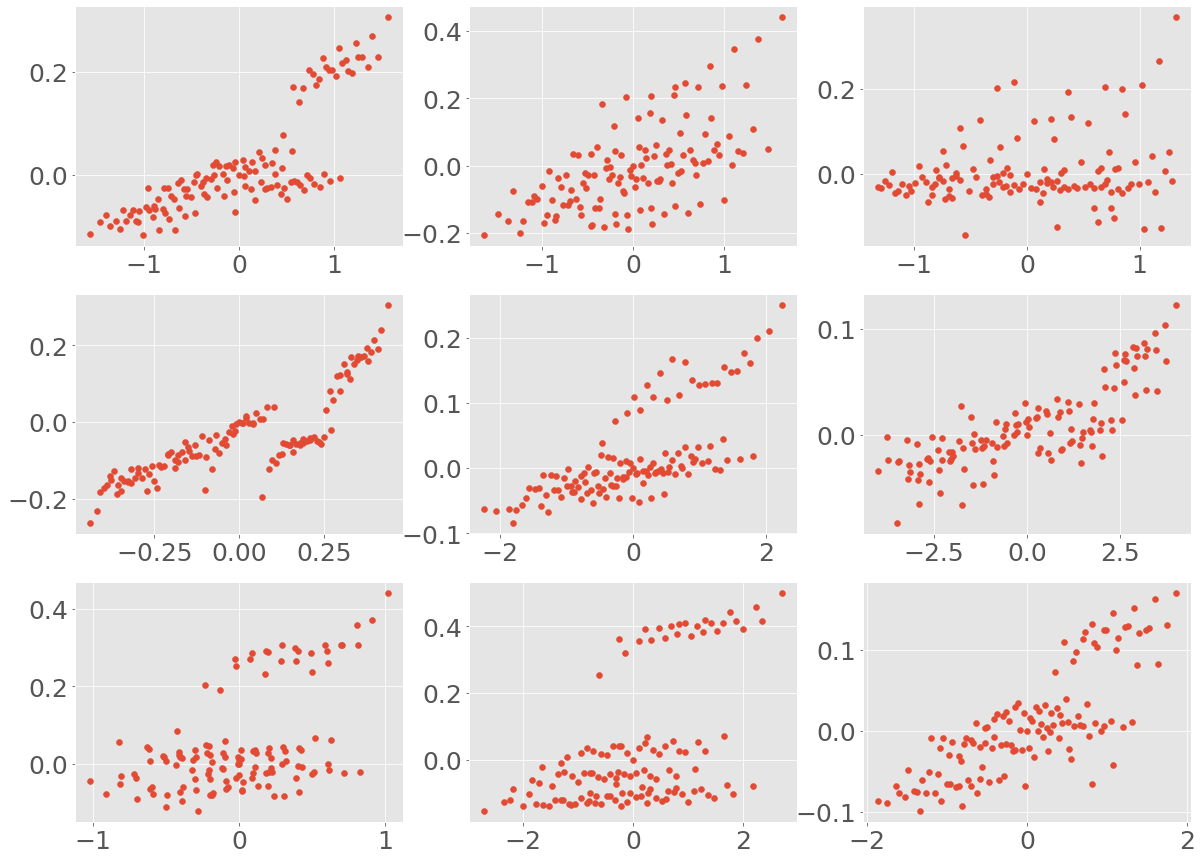

In [4]:
import itertools
fig, ax = plt.subplots(3,3,figsize=(20, 15))

r=2
coeffs = []

for i,j in itertools.product(range(3), range(3)):
    # if (i, j) == (1,1):
    #     break
    try:
        # if (i,j) == (0, 2):
        #     continue
        # if (i,j) == (0,2):
        #     continue
        # if (i,j) == (1,1):
        #     continue
        # if (i,j) == (2,0):
        #     continue
        # if (i,j) == (2,3):
        #     continue
        # if i == 2:
        #     continue
        stats = raw_stats.copy()
        stats = stats[stats['input']  == f"/dataheart/dataset/downtown/downtown_{i*3+j+1}/part%d.mp4"]
        stats = stats[stats['second']  < 9]
        stats = stats.groupby(['qpidx','residx', 'fridx']).mean().reset_index()
        shift_idx = 62
        shifted_stats = stats.copy()
        for key in ['qpidx', 'residx', 'fridx', 'f1', 'inference_sigmoid', 'inference_sum']:
            shifted_stats[key] -= shifted_stats.iloc[shift_idx][key]

        key = 'inference_sigmoid'
        dqp = -abs(shifted_stats[(shifted_stats.qpidx == 1) & (shifted_stats.residx == 0) & (shifted_stats.fridx == 0)].iloc[0][key])
        dres = -abs(shifted_stats[(shifted_stats.qpidx == 0) & (shifted_stats.residx == 1) & (shifted_stats.fridx == 0)].iloc[0][key])
        dbf = -abs(shifted_stats[(shifted_stats.qpidx == 0) & (shifted_stats.residx == 0) & (shifted_stats.fridx == 1)].iloc[0][key])
        
        # shifted_stats = shifted_stats[shifted_stats.fridx == 0]

        shifted_stats['dacc'] = shifted_stats['qpidx'] * dqp + shifted_stats['residx'] * dres + shifted_stats['fridx'] * dbf
        shifted_stats = shifted_stats[(shifted_stats.qpidx.abs() <= r) & (shifted_stats.residx.abs() <= r) & (shifted_stats.fridx.abs() <= r)]
        # shifted_stats = shifted_stats[shifted_stats.qpidx==0]
        ax[i,j].scatter(shifted_stats['dacc'].tolist(), shifted_stats['f1'].tolist())
        coeffs.append(shifted_stats['dacc'].corr(shifted_stats['f1']))
    except:
        pass

import math
coeffs = [i for i in coeffs if not math.isnan(i)]

print(np.mean(coeffs))
print(np.std(coeffs))
# fig.supxlabel('Inference result change')
# fig.supylabel('Accuracy change')
        # ax[i,j].set_xlabel()
        # ax[i,j].set_ylabel()
'''
0.6542347433719974
0.18498531066830531


QP:
0.7103046378626666
0.17857544235856954

0.6726501369649677
0.1738828919729587
'''

'''
0.5715792263744846
0.0873636704383184


'''

Text(0, 0.5, 'Accuracy change (abs)')

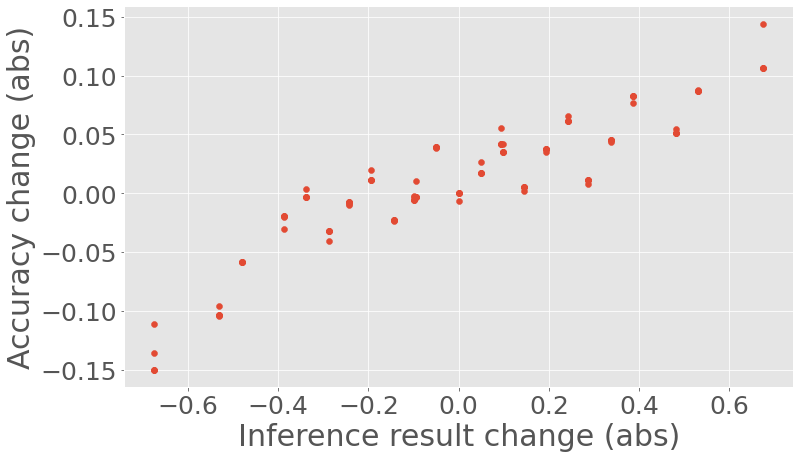

In [43]:
fig, ax = plt.subplots(figsize=(12, 7))
shifted_stats = shifted_stats[(shifted_stats.qpidx.abs() <= 2) & (shifted_stats.residx.abs() <= 2) & (shifted_stats.bframebiasidx.abs() <= 2)]
ax.scatter(shifted_stats['dacc'].tolist(), shifted_stats['f1'].tolist())
ax.set_xlabel('Inference result change (abs)')
ax.set_ylabel('Accuracy change (abs)')

Text(0.5, 0, 'Accuracy')

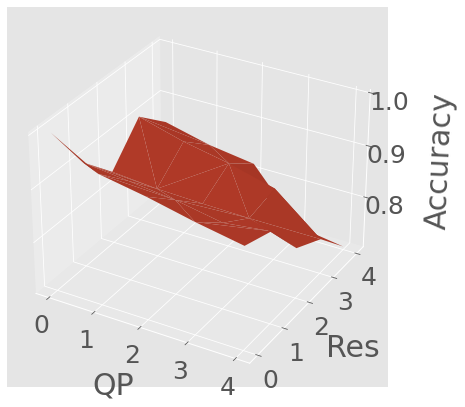

In [84]:
fig = plt.figure(figsize=(12, 7))
ax = fig.gca(projection='3d')
ax.xaxis.labelpad=20
ax.yaxis.labelpad=20
ax.zaxis.labelpad=25
surf = ax.plot_trisurf(stats['qpidx'].tolist(), stats['residx'].tolist(), stats['f1'].tolist())
ax.set_xlabel('QP')
ax.set_ylabel('Res')
ax.set_zlabel('Accuracy')

Text(0.5, 0, 'Proxy')

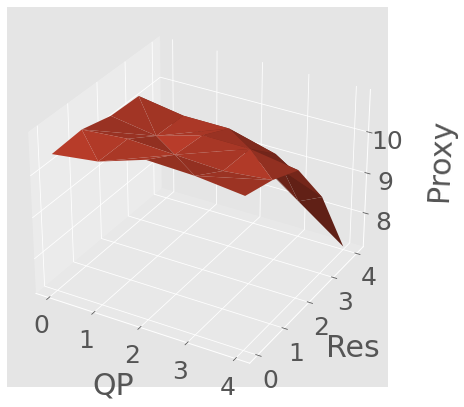

In [83]:
fig = plt.figure(figsize=(12, 7))
ax = fig.gca(projection='3d')
ax.xaxis.labelpad=20
ax.yaxis.labelpad=20
ax.zaxis.labelpad=25
surf = ax.plot_trisurf(stats['qpidx'].tolist(), stats['residx'].tolist(), [i for i in stats['inference_sigmoid'].tolist()])
ax.set_xlabel('QP')
ax.set_ylabel('Res')
ax.set_zlabel('Proxy')


In [81]:
stats['f1'].corr(stats['inference_sigmoid'])

0.7910064219119658